In [3]:
#Solution using tensorflow (generated by ChatGPT, may contain errors)

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#tf.disable_v2_behavior()
# Load data
data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


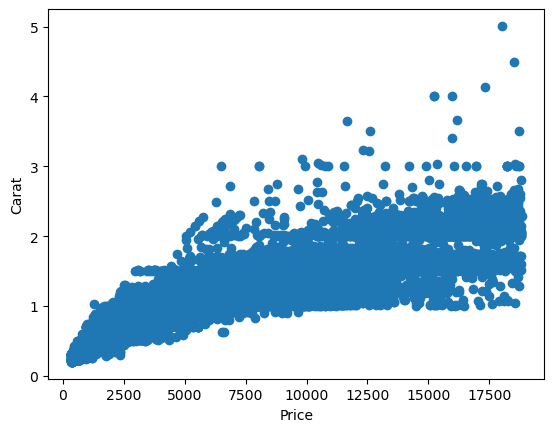

In [4]:

import matplotlib.pyplot as plt

plt.scatter(data["price"], data["carat"])
plt.xlabel("Price")
plt.ylabel("Carat")
plt.show()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)


In [ ]:
from sklearn.model_selection import train_test_split
t = 0.5
data['buy'] = (data['carat'] >= t).astype(int)
data_normalized = scaler.fit_transform(data.drop(['carat'], axis=1))
data_normalized = pd.DataFrame(data_normalized, columns=['price', 'buy'])
X = data_normalized.drop("buy", axis=1)
y = data_normalized["buy"].values

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm.predict(X_test)

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.96
Precision: 0.99
Recall: 0.96
F1 Score: 0.97
